<a href="https://colab.research.google.com/github/NOVA0206/CODSOFT_Tasks/blob/main/Task_2_(Movie_Rating_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#CODSOFT TASK 2 Movie rating prediction Dataset model**

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

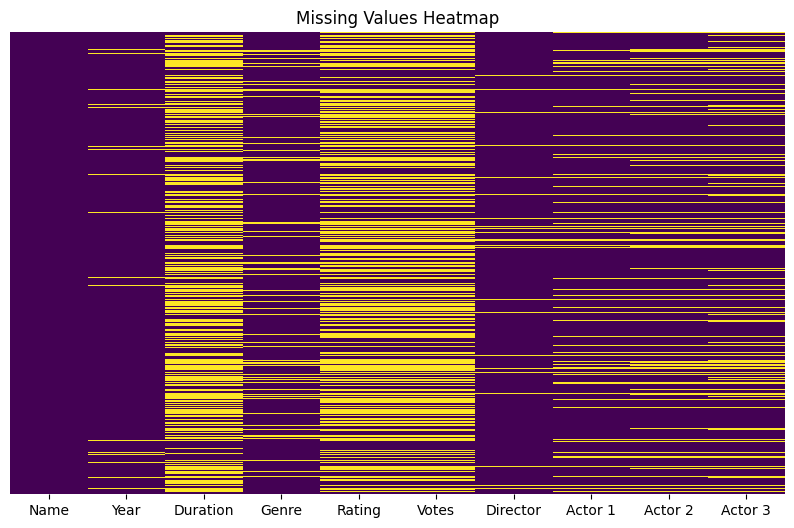

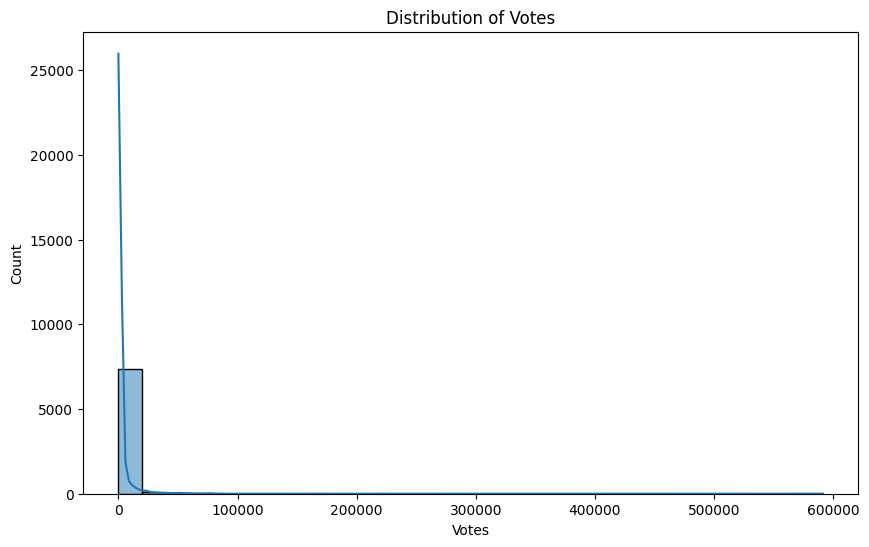

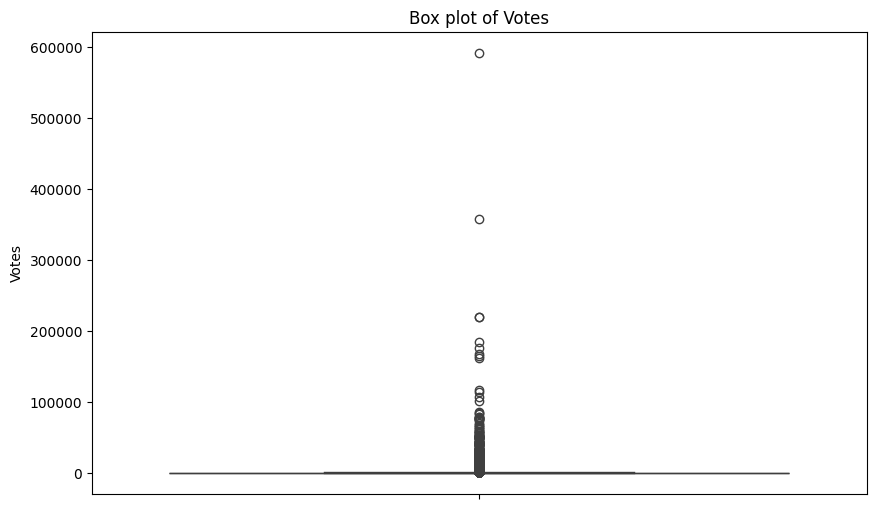

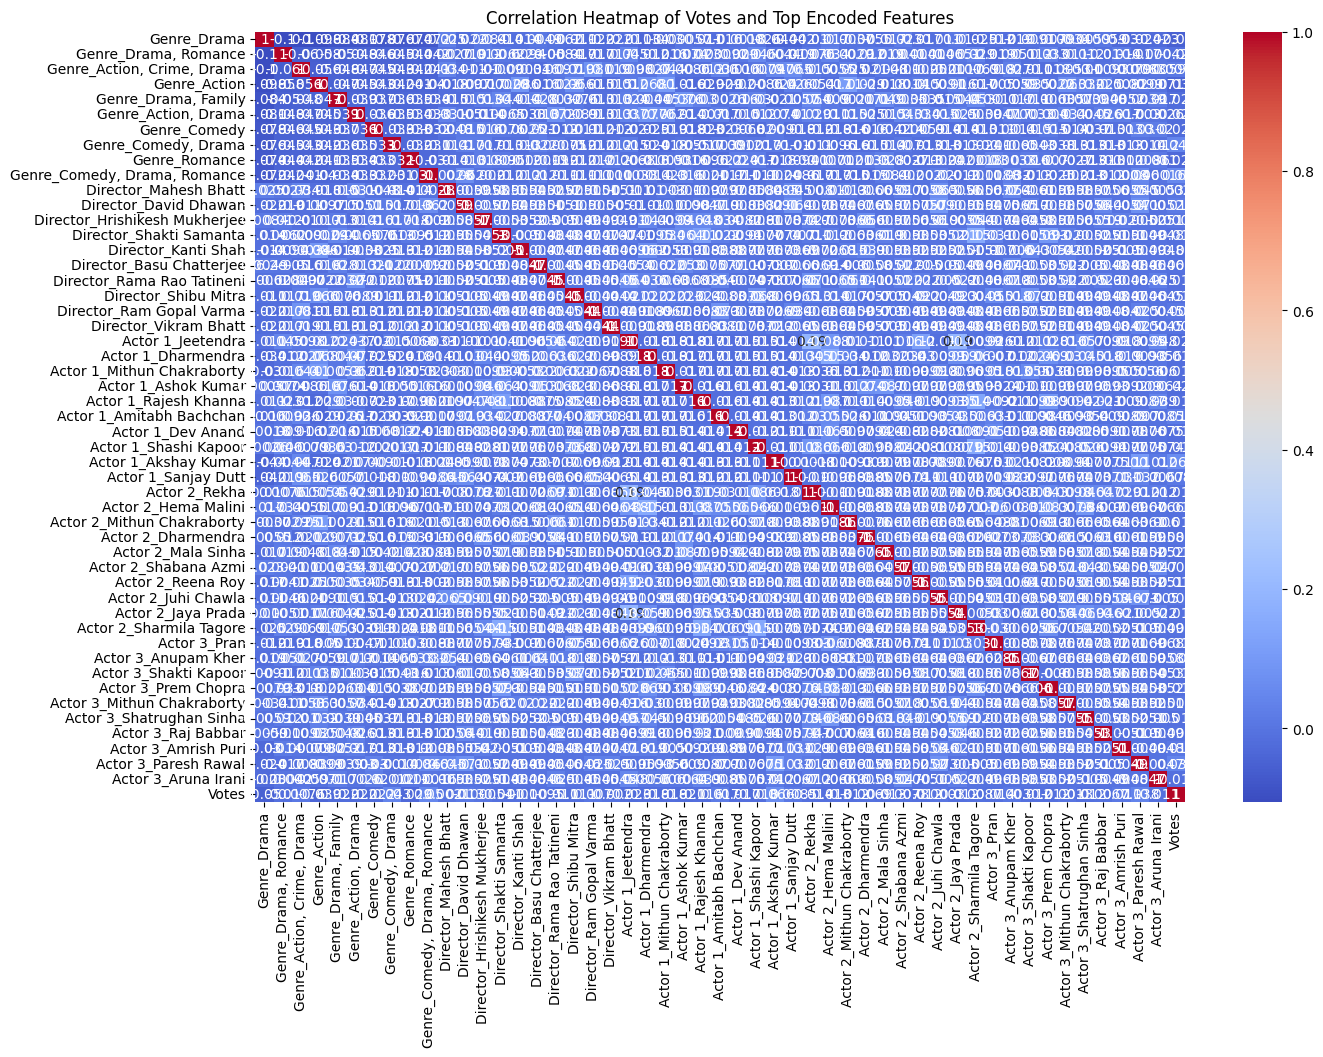

Mean Squared Error: 149496424.45118254
R-squared: 0.016042287189122373


In [46]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data_path = "/content/IMDb Movies India.csv"
data = pd.read_csv(data_path, encoding='latin1')

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Describe the dataset to get statistical summaries of the numerical columns
print(data.describe())

# Check for any missing values
print(data.isna().sum())

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Convert 'Votes' to float before visualizing numerical distributions
data['Votes'] = data['Votes'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Dropping rows with missing values as per your requirements
data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

# Histogram of 'Votes'
plt.figure(figsize=(10, 6))
sns.histplot(data['Votes'], kde=True, bins=30)
plt.title('Distribution of Votes')
plt.show()

# Box plot for 'Votes' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['Votes'])
plt.title('Box plot of Votes')
plt.show()

# After preprocessing - let's visualize the correlation of one-hot encoded features with 'Votes'
encoded_features = []
for feature in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data = limit_one_hot_encode(data, feature, N=10)  # Continuing from your feature engineering
    top_categories = data[feature].value_counts().nlargest(10).index
    encoded_features.extend([f'{feature}_{category}' for category in top_categories])

# Visualizing the correlation of 'Votes' with the top one-hot encoded features
corr_matrix = data[encoded_features + ['Votes']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Votes and Top Encoded Features')
plt.show()

# Drop rows with missing values post 'Votes' cleaning
data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

# Feature Engineering with limited One-Hot Encoding
def limit_one_hot_encode(df, column, N=10):
    top_categories = df[column].value_counts().nlargest(N).index
    for category in top_categories:
        name = f'{column}_{category}'
        df[name] = (df[column] == category).astype(int)
    return df

# Applying limited one-hot encoding and keeping track of generated columns
encoded_features = []
for feature in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data = limit_one_hot_encode(data, feature, N=10)  # Use the correct DataFrame variable here
    top_categories = data[feature].value_counts().nlargest(10).index
    encoded_features.extend([f'{feature}_{category}' for category in top_categories])

X = data[encoded_features]
y = data['Votes']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Assuming 'y_test' and 'y_pred' are available from your model's evaluation
# Creating a DataFrame for easier manipulation with Plotly
results_df = pd.DataFrame({
    'Actual Ratings': y_test,
    'Predicted Ratings': y_pred
}).reset_index(drop=True)

# Plotly Express scatter plot for actual vs predicted ratings
fig = px.scatter(
    results_df, x='Actual Ratings', y='Predicted Ratings',
    opacity=0.65, title="Actual vs Predicted Ratings"
)

# Adding a line for perfect predictions
fig.add_trace(
    go.Scatter(x=[results_df['Actual Ratings'].min(), results_df['Actual Ratings'].max()],
               y=[results_df['Actual Ratings'].min(), results_df['Actual Ratings'].max()],
               name='Perfect Predictions', mode='lines',
               line=dict(color='red', width=2, dash='dash'))
)

# Enhancing the layout for a more informative and user-friendly visualization
fig.update_layout(
    xaxis_title="Actual Ratings",
    yaxis_title="Predicted Ratings",
    legend_title="Legend",
    margin=dict(l=40, r=40, t=40, b=40)
)

# Adding annotations for MSE and R-squared directly on the plot
fig.add_annotation(
    x=1, y=max(results_df['Predicted Ratings']),
    text=f"MSE: {mse:.2f}<br>R-squared: {r2:.2f}",
    showarrow=False,
    yshift=10,
    bordercolor="black",
    borderwidth=2,
    bgcolor="white",
    opacity=0.8
)

fig.show()